In [1]:
# ========================================
# IMPORT LIBRARIES
# ========================================
import pandas as pd
pd.options.display.max_columns = None # Shows all columns
import numpy as np
import json
import dill 
from IPython.display import display
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.io.json import json_normalize 

from sklearn.model_selection import train_test_split

In [111]:
# ========================================
# LOAD DATA
# ========================================
df = pd.read_csv('data/df00.csv', sep=',', na_filter=False, index_col=0)

In [112]:
df.head(2)

,state,backers_count,blurb,converted_pledged_amount,country,created_at,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,name,permissions,pledged,slug,source_url,spotlight,staff_pick,state_changed_at,static_usd_rate,usd_pledged,usd_type,category_color,category_id,category_name,category_parent_id,category_position,category_slug,category_urls.web.discover,creator_avatar.medium,creator_avatar.small,creator_avatar.thumb,creator_chosen_currency,creator_id,creator_is_registered,creator_name,creator_slug,creator_urls.api.user,creator_urls.web.user,location_id,location_name,location_slug,location_short_name,location_displayable_name,location_localized_name,location_country,location_state,location_type,location_is_root,location_urls_web_discover,location_urls_web_location,location_urls_api_nearby_projects,photo_1024x576,photo_1536x864,photo_ed,photo_full,photo_key,photo_little,photo_med,photo_small,photo_thumb,profile_background_color,profile_background_image_attributes.id,profile_background_image_attributes.image_urls.baseball_card,profile_background_image_attributes.image_urls.default,profile_background_image_opacity,profile_blurb,profile_feature_image_attributes.id,profile_feature_image_attributes.image_urls.baseball_card,profile_feature_image_attributes.image_urls.default,profile_id,profile_link_background_color,profile_link_text,profile_link_text_color,profile_link_url,profile_name,profile_project_id,profile_should_show_feature_image_section,profile_show_feature_image,profile_state,profile_state_changed_at,profile_text_color,urls_api.message_creator,urls_api.star,urls_web.message_creator,urls_web.project,urls_web.rewards
21932,successful,241,In this speedy arcade multiplayer arena you do...,7550,AU,1383523737,AUD,$,True,USD,1404419631,False,,0.713531,8000.0,178634548,,False,,1401827631,BEARZERKERS - Subversive Indirect Multiplayer-...,,8049.69,bearzerkers-subversive-indirect-multiplayer,https://www.kickstarter.com/discover/categorie...,True,True,1404419631,0.927159,7463.340116,international,51627,35,Video Games,12.0,7,games/video games,http://www.kickstarter.com/discover/categories...,https://ksr-ugc.imgix.net/assets/006/446/014/a...,https://ksr-ugc.imgix.net/assets/006/446/014/a...,https://ksr-ugc.imgix.net/assets/006/446/014/a...,,397492348,True,Wildgrass,wildgrass,https://api.kickstarter.com/v1/users/397492348...,https://www.kickstarter.com/profile/wildgrass,1100968.0,Canberra,canberra-au,"Canberra, AU","Canberra, AU",Canberra,AU,ACT,Town,False,https://www.kickstarter.com/discover/places/ca...,https://www.kickstarter.com/locations/canberra-au,https://api.kickstarter.com/v1/discover?signat...,https://ksr-ugc.imgix.net/assets/011/601/767/0...,https://ksr-ugc.imgix.net/assets/011/601/767/0...,https://ksr-ugc.imgix.net/assets/011/601/767/0...,https://ksr-ugc.imgix.net/assets/011/601/767/0...,assets/011/601/767/004a1b3a8b896eb0946bbfe40ff...,https://ksr-ugc.imgix.net/assets/011/601/767/0...,https://ksr-ugc.imgix.net/assets/011/601/767/0...,https://ksr-ugc.imgix.net/assets/011/601/767/0...,https://ksr-ugc.imgix.net/assets/011/601/767/0...,,3602797.0,https://ksr-ugc.imgix.net/assets/003/602/797/2...,https://ksr-ugc.imgix.net/assets/003/602/797/2...,1.0,In this speedy arcade multiplayer arena you do...,3602783.0,https://ksr-ugc.imgix.net/assets/003/602/783/2...,https://ksr-ugc.imgix.net/assets/003/602/783/2...,762504,,BUY NOW on STEAM,,http://store.steampowered.com/app/325300,BEARZERKERS - Subversive Indirect Multiplayer,762504,True,True,active,1428891706,ffffff,,,,https://www.kickstarter.com/projects/wildgrass...,https://www.kickstarter.com/projects/wildgrass...
39461,failed,0,The first high tech integrated dairy farm in I...,0,AU,1428747948,AUD,$,True,USD,1432854807,False,,0.713203,3000000.0,205566306,,False,,1428966807,Unnati Manz Biotec Dairy Farms Pvt Ltd,,0.00,unnati-manz-biotec-dairy-farms-pvt-ltd,https://www.kick

In [113]:
df.shape

(164556, 96)

In [114]:
# ========================================
# CLEAN DATA
# ========================================

In [115]:
# ---- REMOVE USELESS VARIABLES ----

In [116]:
df.head(1)

,state,backers_count,blurb,converted_pledged_amount,country,created_at,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,name,permissions,pledged,slug,source_url,spotlight,staff_pick,state_changed_at,static_usd_rate,usd_pledged,usd_type,category_color,category_id,category_name,category_parent_id,category_position,category_slug,category_urls.web.discover,creator_avatar.medium,creator_avatar.small,creator_avatar.thumb,creator_chosen_currency,creator_id,creator_is_registered,creator_name,creator_slug,creator_urls.api.user,creator_urls.web.user,location_id,location_name,location_slug,location_short_name,location_displayable_name,location_localized_name,location_country,location_state,location_type,location_is_root,location_urls_web_discover,location_urls_web_location,location_urls_api_nearby_projects,photo_1024x576,photo_1536x864,photo_ed,photo_full,photo_key,photo_little,photo_med,photo_small,photo_thumb,profile_background_color,profile_background_image_attributes.id,profile_background_image_attributes.image_urls.baseball_card,profile_background_image_attributes.image_urls.default,profile_background_image_opacity,profile_blurb,profile_feature_image_attributes.id,profile_feature_image_attributes.image_urls.baseball_card,profile_feature_image_attributes.image_urls.default,profile_id,profile_link_background_color,profile_link_text,profile_link_text_color,profile_link_url,profile_name,profile_project_id,profile_should_show_feature_image_section,profile_show_feature_image,profile_state,profile_state_changed_at,profile_text_color,urls_api.message_creator,urls_api.star,urls_web.message_creator,urls_web.project,urls_web.rewards
21932,successful,241,In this speedy arcade multiplayer arena you do...,7550,AU,1383523737,AUD,$,True,USD,1404419631,False,,0.713531,8000.0,178634548,,False,,1401827631,BEARZERKERS - Subversive Indirect Multiplayer-...,,8049.69,bearzerkers-subversive-indirect-multiplayer,https://www.kickstarter.com/discover/categorie...,True,True,1404419631,0.927159,7463.340116,international,51627,35,Video Games,12.0,7,games/video games,http://www.kickstarter.com/discover/categories...,https://ksr-ugc.imgix.net/assets/006/446/014/a...,https://ksr-ugc.imgix.net/assets/006/446/014/a...,https://ksr-ugc.imgix.net/assets/006/446/014/a...,,397492348,True,Wildgrass,wildgrass,https://api.kickstarter.com/v1/users/397492348...,https://www.kickstarter.com/profile/wildgrass,1100968.0,Canberra,canberra-au,"Canberra, AU","Canberra, AU",Canberra,AU,ACT,Town,False,https://www.kickstarter.com/discover/places/ca...,https://www.kickstarter.com/locations/canberra-au,https://api.kickstarter.com/v1/discover?signat...,https://ksr-ugc.imgix.net/assets/011/601/767/0...,https://ksr-ugc.imgix.net/assets/011/601/767/0...,https://ksr-ugc.imgix.net/assets/011/601/767/0...,https://ksr-ugc.imgix.net/assets/011/601/767/0...,assets/011/601/767/004a1b3a8b896eb0946bbfe40ff...,https://ksr-ugc.imgix.net/assets/011/601/767/0...,https://ksr-ugc.imgix.net/assets/011/601/767/0...,https://ksr-ugc.imgix.net/assets/011/601/767/0...,https://ksr-ugc.imgix.net/assets/011/601/767/0...,,3602797.0,https://ksr-ugc.imgix.net/assets/003/602/797/2...,https://ksr-ugc.imgix.net/assets/003/602/797/2...,1.0,In this speedy arcade multiplayer arena you do...,3602783.0,https://ksr-ugc.imgix.net/assets/003/602/783/2...,https://ksr-ugc.imgix.net/assets/003/602/783/2...,762504,,BUY NOW on STEAM,,http://store.steampowered.com/app/325300,BEARZERKERS - Subversive Indirect Multiplayer,762504,True,True,active,1428891706,ffffff,,,,https://www.kickstarter.com/projects/wildgrass...,https://www.kickstarter.com/projects/wildgrass...


In [117]:
df.columns

Index(['state', 'backers_count', 'blurb', 'converted_pledged_amount',
       'country', 'created_at', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'name',
       'permissions', 'pledged', 'slug', 'source_url', 'spotlight',
       'staff_pick', 'state_changed_at', 'static_usd_rate', 'usd_pledged',
       'usd_type', 'category_color', 'category_id', 'category_name',
       'category_parent_id', 'category_position', 'category_slug',
       'category_urls.web.discover', 'creator_avatar.medium',
       'creator_avatar.small', 'creator_avatar.thumb',
       'creator_chosen_currency', 'creator_id', 'creator_is_registered',
       'creator_name', 'creator_slug', 'creator_urls.api.user',
       'creator_urls.web.user', 'location_id', 'location_name',
       'location_slug', 'location_short_name', 'location_displa

In [118]:
# Most of the not-useful variables are obvious just by just looking at them. One not so clear is profile_state
df['profile_state'].unique()

array(['active', 'inactive'], dtype=object)

In [119]:
len(df[df['profile_state'] == 'active']) / len(df)

0.11733999367996305

In [120]:
# profile_state is not useful.
# This is a bit of a guess. Only a small portiion of the profile state are labeled 'active' (11.7%).
# My guess is that the profiles go latent once a projct is finished (perhaps regardless of whether it was successful or not)

In [121]:
# Remove useless keys 
drop_vars = ['photo_1024x576', 'photo_1536x864', 'photo_ed', 'photo_full', 
             'photo_key', 'photo_little', 'photo_med', 'photo_small', 'photo_thumb',
             'slug', 'urls_api.message_creator', 'urls_api.star', 'urls_web.message_creator',
             'urls_web.project', 'urls_web.rewards', 'source_url', 'creator_avatar.medium',
             'creator_avatar.small', 'creator_avatar.thumb', 'creator_chosen_currency', 
             'creator_id', 'creator_name', 'creator_slug', 'creator_urls.api.user',
             'creator_urls.web.user', 'location_id', 'location_name', 'location_slug', 
             'location_short_name', 'location_displayable_name', 'location_localized_name',
             'location_type', 'location_is_root', 'location_urls_web_discover',
             'location_urls_web_location', 'location_urls_api_nearby_projects', 'category_color', 
             'category_id', 'category_urls.web.discover', 'profile_background_color', 
             'profile_background_image_attributes.id', 
             'profile_background_image_attributes.image_urls.baseball_card', 
             'profile_background_image_attributes.image_urls.default',
             'profile_background_image_opacity', 'profile_blurb', 
             'profile_feature_image_attributes.id', 
             'profile_feature_image_attributes.image_urls.baseball_card',
             'profile_feature_image_attributes.image_urls.default', 'profile_id',
             'profile_link_background_color', 'profile_link_text', 'profile_link_text_color', 
             'profile_link_url', 'profile_name', 'profile_project_id', 
             'profile_should_show_feature_image_section', 'profile_show_feature_image', 
             'profile_state', 'profile_state_changed_at', 'profile_text_color']

In [122]:
df.head(2)

,state,backers_count,blurb,converted_pledged_amount,country,created_at,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,name,permissions,pledged,slug,source_url,spotlight,staff_pick,state_changed_at,static_usd_rate,usd_pledged,usd_type,category_color,category_id,category_name,category_parent_id,category_position,category_slug,category_urls.web.discover,creator_avatar.medium,creator_avatar.small,creator_avatar.thumb,creator_chosen_currency,creator_id,creator_is_registered,creator_name,creator_slug,creator_urls.api.user,creator_urls.web.user,location_id,location_name,location_slug,location_short_name,location_displayable_name,location_localized_name,location_country,location_state,location_type,location_is_root,location_urls_web_discover,location_urls_web_location,location_urls_api_nearby_projects,photo_1024x576,photo_1536x864,photo_ed,photo_full,photo_key,photo_little,photo_med,photo_small,photo_thumb,profile_background_color,profile_background_image_attributes.id,profile_background_image_attributes.image_urls.baseball_card,profile_background_image_attributes.image_urls.default,profile_background_image_opacity,profile_blurb,profile_feature_image_attributes.id,profile_feature_image_attributes.image_urls.baseball_card,profile_feature_image_attributes.image_urls.default,profile_id,profile_link_background_color,profile_link_text,profile_link_text_color,profile_link_url,profile_name,profile_project_id,profile_should_show_feature_image_section,profile_show_feature_image,profile_state,profile_state_changed_at,profile_text_color,urls_api.message_creator,urls_api.star,urls_web.message_creator,urls_web.project,urls_web.rewards
21932,successful,241,In this speedy arcade multiplayer arena you do...,7550,AU,1383523737,AUD,$,True,USD,1404419631,False,,0.713531,8000.0,178634548,,False,,1401827631,BEARZERKERS - Subversive Indirect Multiplayer-...,,8049.69,bearzerkers-subversive-indirect-multiplayer,https://www.kickstarter.com/discover/categorie...,True,True,1404419631,0.927159,7463.340116,international,51627,35,Video Games,12.0,7,games/video games,http://www.kickstarter.com/discover/categories...,https://ksr-ugc.imgix.net/assets/006/446/014/a...,https://ksr-ugc.imgix.net/assets/006/446/014/a...,https://ksr-ugc.imgix.net/assets/006/446/014/a...,,397492348,True,Wildgrass,wildgrass,https://api.kickstarter.com/v1/users/397492348...,https://www.kickstarter.com/profile/wildgrass,1100968.0,Canberra,canberra-au,"Canberra, AU","Canberra, AU",Canberra,AU,ACT,Town,False,https://www.kickstarter.com/discover/places/ca...,https://www.kickstarter.com/locations/canberra-au,https://api.kickstarter.com/v1/discover?signat...,https://ksr-ugc.imgix.net/assets/011/601/767/0...,https://ksr-ugc.imgix.net/assets/011/601/767/0...,https://ksr-ugc.imgix.net/assets/011/601/767/0...,https://ksr-ugc.imgix.net/assets/011/601/767/0...,assets/011/601/767/004a1b3a8b896eb0946bbfe40ff...,https://ksr-ugc.imgix.net/assets/011/601/767/0...,https://ksr-ugc.imgix.net/assets/011/601/767/0...,https://ksr-ugc.imgix.net/assets/011/601/767/0...,https://ksr-ugc.imgix.net/assets/011/601/767/0...,,3602797.0,https://ksr-ugc.imgix.net/assets/003/602/797/2...,https://ksr-ugc.imgix.net/assets/003/602/797/2...,1.0,In this speedy arcade multiplayer arena you do...,3602783.0,https://ksr-ugc.imgix.net/assets/003/602/783/2...,https://ksr-ugc.imgix.net/assets/003/602/783/2...,762504,,BUY NOW on STEAM,,http://store.steampowered.com/app/325300,BEARZERKERS - Subversive Indirect Multiplayer,762504,True,True,active,1428891706,ffffff,,,,https://www.kickstarter.com/projects/wildgrass...,https://www.kickstarter.com/projects/wildgrass...
39461,failed,0,The first high tech integrated dairy farm in I...,0,AU,1428747948,AUD,$,True,USD,1432854807,False,,0.713203,3000000.0,205566306,,False,,1428966807,Unnati Manz Biotec Dairy Farms Pvt Ltd,,0.00,unnati-manz-biotec-dairy-farms-pvt-ltd,https://www.kick

In [123]:
df.drop(columns=drop_vars, inplace=True)

In [124]:
df.shape

(164556, 36)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164556 entries, 21932 to 176991
Data columns (total 36 columns):
state                       164556 non-null object
backers_count               164556 non-null int64
blurb                       164556 non-null object
converted_pledged_amount    164556 non-null int64
country                     164556 non-null object
created_at                  164556 non-null int64
currency                    164556 non-null object
currency_symbol             164556 non-null object
currency_trailing_code      164556 non-null bool
current_currency            164556 non-null object
deadline                    164556 non-null int64
disable_communication       164556 non-null bool
friends                     164556 non-null object
fx_rate                     164556 non-null float64
goal                        164556 non-null float64
id                          164556 non-null int64
is_backing                  164556 non-null object
is_starrable             

In [126]:
df.head(1)

,state,backers_count,blurb,converted_pledged_amount,country,created_at,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,name,permissions,pledged,spotlight,staff_pick,state_changed_at,static_usd_rate,usd_pledged,usd_type,category_name,category_parent_id,category_position,category_slug,creator_is_registered,location_country,location_state
21932,successful,241,In this speedy arcade multiplayer arena you do...,7550,AU,1383523737,AUD,$,True,USD,1404419631,False,,0.713531,8000.0,178634548,,False,,1401827631,BEARZERKERS - Subversive Indirect Multiplayer-...,,8049.69,True,True,1404419631,0.927159,7463.340116,international,Video Games,12.0,7,games/video games,True,AU,ACT


In [127]:
# ---- REARRANGE COLUMNS ----
df.columns

Index(['state', 'backers_count', 'blurb', 'converted_pledged_amount',
       'country', 'created_at', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'name',
       'permissions', 'pledged', 'spotlight', 'staff_pick', 'state_changed_at',
       'static_usd_rate', 'usd_pledged', 'usd_type', 'category_name',
       'category_parent_id', 'category_position', 'category_slug',
       'creator_is_registered', 'location_country', 'location_state'],
      dtype='object')

In [128]:
# Re-order columns
df = df[['state', 'id', 'name', 'blurb', 'backers_count', 'converted_pledged_amount',
       'country', 'created_at', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at',
       'permissions', 'pledged', 'spotlight', 'staff_pick', 'state_changed_at',
       'static_usd_rate', 'usd_pledged', 'usd_type', 'category_name',
       'category_parent_id', 'category_position', 'category_slug',
       'creator_is_registered', 'location_country', 'location_state']]

In [129]:
len(df.columns)

36

In [130]:
df.columns

Index(['state', 'id', 'name', 'blurb', 'backers_count',
       'converted_pledged_amount', 'country', 'created_at', 'currency',
       'currency_symbol', 'currency_trailing_code', 'current_currency',
       'deadline', 'disable_communication', 'friends', 'fx_rate', 'goal',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at',
       'permissions', 'pledged', 'spotlight', 'staff_pick', 'state_changed_at',
       'static_usd_rate', 'usd_pledged', 'usd_type', 'category_name',
       'category_parent_id', 'category_position', 'category_slug',
       'creator_is_registered', 'location_country', 'location_state'],
      dtype='object')

In [428]:
# ---- REMOVE DUPLICATES ----

In [131]:
df.sort_values(by=["backers_count"],ascending=False)[["id","name","backers_count"]]

,id,name,backers_count
69279,557230947,"Bring Reading Rainbow Back for Every Child, Ev...",105857
150213,1755266685,The Veronica Mars Movie Project,91585
13732,1929840910,Double Fine Adventure,87142
53281,1929840910,Double Fine Adventure,87142
136791,286165030,Torment: Tides of Numenera,74405
129025,286165030,Torment: Tides of Numenera,74405
186022,458565935,Project Eternity,73986
141451,458565935,Project Eternity,73986
114940,947809001,Shenmue 3,69320
80539,506924864,Pebble: E-Paper Watch for iPhone and Android,68929


In [132]:
df.drop_duplicates(inplace=True)

In [133]:
# Search for more duplicates
len(df["id"].unique()) - len(df)

-1396

In [134]:
# Explore the duplicate ID rows
#pd.concat(g for _, g in df.groupby("id") if len(g) > 1)

In [135]:
# It looks like some of the rows look different due to usd_pledged, converted_pledged_amount, fx_rate (which appears to be 
# exchange rate), and current_currency. Let's just delete the following currency-related columns:
# currency_symbol, static_usd_rate, convertd_pledged_amount, fx_rate, current_currency, usd_type
df.drop(columns=['currency_symbol','static_usd_rate','converted_pledged_amount','fx_rate','current_currency'], 
        inplace=True)

In [136]:
df.drop_duplicates(inplace=True)

In [137]:
# Search for more duplicates
len(df["id"].unique()) - len(df)

-917

In [138]:
df

,state,id,name,blurb,backers_count,country,created_at,currency,currency_trailing_code,deadline,disable_communication,friends,goal,is_backing,is_starrable,is_starred,launched_at,permissions,pledged,spotlight,staff_pick,state_changed_at,usd_pledged,usd_type,category_name,category_parent_id,category_position,category_slug,creator_is_registered,location_country,location_state
21932,successful,178634548,BEARZERKERS - Subversive Indirect Multiplayer-...,In this speedy arcade multiplayer arena you do...,241,AU,1383523737,AUD,True,1404419631,False,,8000.0,,False,,1401827631,,8049.69,True,True,1404419631,7463.340116,international,Video Games,12.0,7,games/video games,True,AU,ACT
39461,failed,205566306,Unnati Manz Biotec Dairy Farms Pvt Ltd,The first high tech integrated dairy farm in I...,0,AU,1428747948,AUD,True,1432854807,False,,3000000.0,,False,,1428966807,,0.00,False,False,1432854808,0.000000,international,Farms,10.0,7,food/farms,True,IN,Maharashtra
143511,successful,2046843379,Out of the Blue - The Buddy Cop RPG,A storytelling game for three players that evo...,62,US,1370896246,USD,True,1379823650,False,,1000.0,,False,,1377231650,,1900.00,True,False,1379823650,1900.000000,international,Tabletop Games,12.0,6,games/tabletop games,True,US,OR
65630,successful,756644238,Monkey Brains Books series launch of Book #1,“STICKS & STONES...and Stupid Jerks”\r\nHow 1 ...,75,US,1334175332,USD,True,1337301846,False,,8000.0,,False,,1334709846,,8135.00,True,False,1337301846,8135.000000,international,Children's Books,18.0,5,publishing/children's books,True,US,TN
109945,successful,714374402,Gira de Quemar las naves. El viaje de Emma,Emma se embarca huyendo del dolor por la muert...,61,MX,1499310511,MXN,True,1504926336,False,,85000.0,,False,,1499742336,,87800.00,True,False,1504926337,4854.657794,international,Festivals,17.0,3,theater/festivals,True,MX,Distrito Federal
129115,successful,1628137523,Trophy Buffet - Celebrate Something,"Life is awesome and life should be celebrated,...",555,US,1368474993,USD,True,1374897540,False,,20000.0,,False,,1372194905,,25178.66,True,True,1374897542,25178.660000,international,Design,,5,design,True,US,NY
38173,successful,1191487471,The Tortolita Twelve,“The Tortolita Twelve” is a unique and lyrical...,23,US,1309970143,USD,True,1313625536,False,,1200.0,,False,,1310169536,,1236.00,True,False,1313625536,1236.000000,international,Shorts,11.0,16,film & video/shorts,True,US,AZ
196655,successful,1248847804,Silent Eye Episode 3 - The Unlocking Thought,Episode 3 of sci-fi anthology series SILENT EYE.,42,GB,1535805232,GBP,False,1537376266,False,,500.0,,False,,1536166666,,1370.00,True,False,1537376266,1761.797285,international,Science Fiction,11.0,15,film & video/science fiction,True,GB,England
35815,successful,468390694,The Snack Shack,We have put together some of the finest snacks...,55,US,1484415423,USD,True,1487280242,False,,500.0,,False,,1484688242,,1910.00,True,False,1487280313,1910.000000,international,Small Batch,10.0,10,food/small batch,True,US,WI
42761,failed,315593760,The Online Busker - Legal Music Downloads,The Online Music Busker - Free legal music dow...,1,IE,1414968637,EUR,False,1420235632,False,,1250.0,,False,,1415051632,,1.00,False,False,1420235632,1.252477,international,Web,16.0,15,technology/web,True,IE,Dublin


In [139]:
# It looks like there are differences with pledged, backers_count and usd_pledged

In [140]:
# usd_pledged is redundant with pledged - remove usd_pledged
df.drop(columns=['usd_pledged'], inplace=True)

In [141]:
df.drop_duplicates(inplace=True)

In [142]:
# Search for more duplicates
len(df["id"].unique()) - len(df)

-906

In [143]:
# is_starrable is unclear and seems to be a problem with duplicates. Let's drop it
df.drop(columns=['is_starrable'], inplace=True)

In [144]:
df.drop_duplicates(inplace=True)

In [145]:
# Search for more duplicates
len(df["id"].unique()) - len(df)

-905

In [146]:
# Still differences between pledged and backers_count. Without some sort of a time stamp we don't know which one is the most
# updated row. Let's look for duplicate IDs, then keep the rows with the largest pledge values

In [147]:
df = df.sort_values('pledged', ascending=False).drop_duplicates('id').sort_index()

In [148]:
# Search for more duplicates
len(df["id"].unique()) - len(df)

0

In [149]:
# No more duplicates!

In [150]:
df.shape

(152584, 29)

In [151]:
df.columns

Index(['state', 'id', 'name', 'blurb', 'backers_count', 'country',
       'created_at', 'currency', 'currency_trailing_code', 'deadline',
       'disable_communication', 'friends', 'goal', 'is_backing', 'is_starred',
       'launched_at', 'permissions', 'pledged', 'spotlight', 'staff_pick',
       'state_changed_at', 'usd_type', 'category_name', 'category_parent_id',
       'category_position', 'category_slug', 'creator_is_registered',
       'location_country', 'location_state'],
      dtype='object')

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152584 entries, 0 to 205695
Data columns (total 29 columns):
state                     152584 non-null object
id                        152584 non-null int64
name                      152584 non-null object
blurb                     152584 non-null object
backers_count             152584 non-null int64
country                   152584 non-null object
created_at                152584 non-null int64
currency                  152584 non-null object
currency_trailing_code    152584 non-null bool
deadline                  152584 non-null int64
disable_communication     152584 non-null bool
friends                   152584 non-null object
goal                      152584 non-null float64
is_backing                152584 non-null object
is_starred                152584 non-null object
launched_at               152584 non-null int64
permissions               152584 non-null object
pledged                   152584 non-null float64
spotlight     

In [153]:
# Re-index
df.reset_index(drop=True, inplace=True)

In [154]:
df.shape

(152584, 29)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152584 entries, 0 to 152583
Data columns (total 29 columns):
state                     152584 non-null object
id                        152584 non-null int64
name                      152584 non-null object
blurb                     152584 non-null object
backers_count             152584 non-null int64
country                   152584 non-null object
created_at                152584 non-null int64
currency                  152584 non-null object
currency_trailing_code    152584 non-null bool
deadline                  152584 non-null int64
disable_communication     152584 non-null bool
friends                   152584 non-null object
goal                      152584 non-null float64
is_backing                152584 non-null object
is_starred                152584 non-null object
launched_at               152584 non-null int64
permissions               152584 non-null object
pledged                   152584 non-null float64
spotlight     

In [156]:
df.head(1)

,state,id,name,blurb,backers_count,country,created_at,currency,currency_trailing_code,deadline,disable_communication,friends,goal,is_backing,is_starred,launched_at,permissions,pledged,spotlight,staff_pick,state_changed_at,usd_type,category_name,category_parent_id,category_position,category_slug,creator_is_registered,location_country,location_state
0,failed,895922629,Jozii-College Jobs Made Easy,Jozii is the premier service for full-time uni...,1,US,1413476386,USD,True,1417150740,False,,3500.0,,,1414525374,,50.0,False,False,1417150742,international,Web,16.0,15,technology/web,True,US,NY


In [157]:
len(df.columns)

29

In [158]:
# Look into 'friends'
df['friends'].unique()

array(['', '[]',
       "[{'id': 918040957, 'name': 'Eoin Burke', 'is_registered': True, 'chosen_currency': None, 'avatar': {'thumb': 'https://ksr-ugc.imgix.net/assets/006/069/426/372465d414f91f836611bfc263df9955_original.jpg?ixlib=rb-1.1.0&w=40&h=40&fit=crop&v=1461364551&auto=format&frame=1&q=92&s=5f69219aff1347580b235fa45f3a3364', 'small': 'https://ksr-ugc.imgix.net/assets/006/069/426/372465d414f91f836611bfc263df9955_original.jpg?ixlib=rb-1.1.0&w=160&h=160&fit=crop&v=1461364551&auto=format&frame=1&q=92&s=1d06855c1342efdabbe77d1e596c864f', 'medium': 'https://ksr-ugc.imgix.net/assets/006/069/426/372465d414f91f836611bfc263df9955_original.jpg?ixlib=rb-1.1.0&w=160&h=160&fit=crop&v=1461364551&auto=format&frame=1&q=92&s=1d06855c1342efdabbe77d1e596c864f'}, 'urls': {'web': {'user': 'https://www.kickstarter.com/profile/918040957'}, 'api': {'user': 'https://api.kickstarter.com/v1/users/918040957?signature=1539925666.20d290d615ab924970bf4efb351bfea339b9b422'}}}]"],
      dtype=object)

In [159]:
# delete friends
df.drop(columns='friends', inplace=True)

In [160]:
len(df.columns)

28

In [161]:
# Look into 'is_backing', 'is_starred', and 'permissions'

In [162]:
df['is_backing'].unique()

array(['', 'False'], dtype=object)

In [163]:
df['is_starred'].unique()

array(['', 'False'], dtype=object)

In [164]:
df['permissions'].unique()

array(['', '[]'], dtype=object)

In [165]:
# delete 'is_backing', 'is_starred', 'permissions'
df.drop(columns=['is_backing', 'is_starred', 'permissions'], inplace=True)

In [166]:
len(df.columns)

25

In [167]:
df.columns

Index(['state', 'id', 'name', 'blurb', 'backers_count', 'country',
       'created_at', 'currency', 'currency_trailing_code', 'deadline',
       'disable_communication', 'goal', 'launched_at', 'pledged', 'spotlight',
       'staff_pick', 'state_changed_at', 'usd_type', 'category_name',
       'category_parent_id', 'category_position', 'category_slug',
       'creator_is_registered', 'location_country', 'location_state'],
      dtype='object')

In [168]:
df.head(1)

,state,id,name,blurb,backers_count,country,created_at,currency,currency_trailing_code,deadline,disable_communication,goal,launched_at,pledged,spotlight,staff_pick,state_changed_at,usd_type,category_name,category_parent_id,category_position,category_slug,creator_is_registered,location_country,location_state
0,failed,895922629,Jozii-College Jobs Made Easy,Jozii is the premier service for full-time uni...,1,US,1413476386,USD,True,1417150740,False,3500.0,1414525374,50.0,False,False,1417150742,international,Web,16.0,15,technology/web,True,US,NY


In [468]:
# ---- FURTHER REFINE VARIABLES ----

In [169]:
df.columns

Index(['state', 'id', 'name', 'blurb', 'backers_count', 'country',
       'created_at', 'currency', 'currency_trailing_code', 'deadline',
       'disable_communication', 'goal', 'launched_at', 'pledged', 'spotlight',
       'staff_pick', 'state_changed_at', 'usd_type', 'category_name',
       'category_parent_id', 'category_position', 'category_slug',
       'creator_is_registered', 'location_country', 'location_state'],
      dtype='object')

In [173]:
df['country'].unique()

array(['US', 'GB', 'CA', 'AU', 'ES', 'DE', 'SE', 'IT', 'BE', 'DK', 'AT',
       'CH', 'HK', 'SG', 'NO', 'NL', 'IE', 'FR', 'NZ', 'MX', 'JP', 'LU'],
      dtype=object)

In [174]:
len(df['country'].unique())

22

In [172]:
len(df['location_state'].unique())

1087

In [175]:
df['location_country'].unique()

array(['US', 'GB', 'CA', 'AU', 'ES', 'DE', 'NA', 'SE', 'IT', 'PA', 'BE',
       'NO', 'IL', 'DK', 'BR', 'AT', 'CH', 'NG', '', 'HK', 'SG', 'PR',
       'ZW', 'NL', 'IE', 'AR', 'FR', 'NZ', 'RO', 'MX', 'FI', 'IN', 'EG',
       'TR', 'JP', 'ZA', 'PT', 'TW', 'RW', 'MN', 'UA', 'GR', 'CL', 'KE',
       'PE', 'MY', 'HR', 'PL', 'CZ', 'SR', 'CO', 'CN', 'MW', 'SJ', 'NP',
       'KR', 'MD', 'RU', 'CR', 'UY', 'JO', 'BG', 'MA', 'SV', 'TN', 'HU',
       'GH', 'JM', 'BT', 'UG', 'IS', 'VE', 'LT', 'KP', 'PH', 'ID', 'VN',
       'SC', 'YE', 'ML', 'TH', 'MO', 'PG', 'TZ', 'AE', 'CU', 'AX', 'KH',
       'GT', 'BO', 'CY', 'ZM', 'CM', 'BZ', 'PF', 'AM', 'BB', 'GP', 'SI',
       'SL', 'BD', 'VI', 'SK', 'GL', 'HT', 'SN', 'AF', 'AQ', 'EC', 'IQ',
       'FO', 'ET', 'NI', 'BA', 'TT', 'DO', 'LK', 'MG', 'GM', 'RS', 'HN',
       'MT', 'CV', 'VU', 'BF', 'BW', 'EE', 'LU', 'MC', 'SY', 'AL', 'MM',
       'LV', 'PK', 'TO', 'SZ', 'GE', 'IR', 'KW', 'LB', 'AG', 'BS', 'KZ',
       'RE', 'XK', 'KG', 'CI', 'AI', 'PS', 'FM', 'SS'

In [176]:
len(df['location_country'].unique())

194

In [102]:
df[df['country'] != df['location_country']][['country','location_country']]

,country,location_country
14,GB,DE
35,DE,NA
50,US,PA
53,US,CA
92,US,NO
98,US,IL
115,US,BR
152,US,NG
173,US,
174,US,AU


# variable notes

## delete
* name - delete
* blurb - delete
* loc_state - delete (too granular)
* locaton_country - delete (not sure how it differs from loc_country; largely redundant; 7997 rows where they are not equal)
* currency - delete (pledges is in usd)
* currency_trailing_code - delete (what is it?)
* state_changed_at - delete

## keep
* id - keep (primary key)
* category_name - keep; change to sub_category
* category slug - keep; extract first word; change to category
* category_position - keep; change to sub_category_id; move before sub_category
* category_parent_id - keep; change to category_id; move before category
* country - keep; it's less granular than location_country
* goal - keep
* pledged - keep
* disable_communication - keep (but what is it??)
* loc_country - keep (where the project is launche from); rename as country
* deadline - keep; convert to datetime
* created_at - keep; convert to datetime
* launched_at - keep; convert to datetime
* staff_pick - keep
* backers_count - keep; move before pledged
* spotlight - keep (but what is it?)
* creator_registered - keep
* state - keep

In [177]:
df.drop(columns=['name','blurb','location_state','location_country','currency','currency_trailing_code','state_changed_at'], inplace=True)

In [178]:
len(df.columns)

18

In [179]:
df.columns

Index(['state', 'id', 'backers_count', 'country', 'created_at', 'deadline',
       'disable_communication', 'goal', 'launched_at', 'pledged', 'spotlight',
       'staff_pick', 'usd_type', 'category_name', 'category_parent_id',
       'category_position', 'category_slug', 'creator_is_registered'],
      dtype='object')

In [180]:
# Rename columns
df.rename(columns={'category_name':'sub_category', 'category_slug':'category', 'category_position':'sub_category_id', 
                  'category_parent_id':'category_id', 'state':'launch_state'}, inplace=True)

In [181]:
df.columns

Index(['launch_state', 'id', 'backers_count', 'country', 'created_at',
       'deadline', 'disable_communication', 'goal', 'launched_at', 'pledged',
       'spotlight', 'staff_pick', 'usd_type', 'sub_category', 'category_id',
       'sub_category_id', 'category', 'creator_is_registered'],
      dtype='object')

In [182]:
# Re-arrange columns
df = df[['launch_state', 'id', 'sub_category_id', 'sub_category', 'category_id', 'category', 'goal', 'backers_count', 'pledged', 
         'usd_type', 'disable_communication', 'country','deadline', 'created_at', 'launched_at', 'staff_pick', 'spotlight', 
         'creator_is_registered']]

In [183]:
df.columns

Index(['launch_state', 'id', 'sub_category_id', 'sub_category', 'category_id',
       'category', 'goal', 'backers_count', 'pledged', 'usd_type',
       'disable_communication', 'country', 'deadline', 'created_at',
       'launched_at', 'staff_pick', 'spotlight', 'creator_is_registered'],
      dtype='object')

In [184]:
df.sort_values(by=['category_id','sub_category_id'])

,launch_state,id,sub_category_id,sub_category,category_id,category,goal,backers_count,pledged,usd_type,disable_communication,country,deadline,created_at,launched_at,staff_pick,spotlight,creator_is_registered
147,live,832160248,1,Art,,art,400.0,19,287.00,international,False,US,1541556000,1538312306,1538580087,False,False,True
213,successful,818945492,1,Art,,art,5000.0,95,5772.66,international,False,US,1325825940,1322524523,1323134842,True,True,True
236,live,300983907,1,Art,,art,15000.0,206,66813.00,international,False,GB,1542281839,1537087038,1537094239,False,False,True
325,successful,1225444603,1,Art,,art,15000.0,321,19000.00,international,False,US,1332296883,1327853711,1329708483,False,True,True
335,successful,157527007,1,Art,,art,4000.0,113,4709.13,international,False,US,1304139600,1301018734,1301544918,False,True,True
354,successful,1698782334,1,Art,,art,800.0,28,875.00,international,False,US,1308106406,1305331290,1305514406,True,True,True
377,successful,1931700518,1,Art,,art,1000.0,43,1020.00,international,False,US,1314199840,1311898476,1312385440,False,True,True
394,successful,2118944684,1,Art,,art,250.0,21,638.00,international,False,US,1299646740,1299034158,1299063235,False,True,True
395,successful,658669261,1,Art,,art,1500.0,33,2836.00,international,False,US,1301184000,1297794480,1298385262,False,True,True
1244,successful,1311670444,1,Art,,art,1500.0,39,1787.13,international,False,US,1309018860,1306711651,1307121435,False,True,True


In [185]:
# Look into column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152584 entries, 0 to 152583
Data columns (total 18 columns):
launch_state             152584 non-null object
id                       152584 non-null int64
sub_category_id          152584 non-null int64
sub_category             152584 non-null object
category_id              152584 non-null object
category                 152584 non-null object
goal                     152584 non-null float64
backers_count            152584 non-null int64
pledged                  152584 non-null float64
usd_type                 152584 non-null object
disable_communication    152584 non-null bool
country                  152584 non-null object
deadline                 152584 non-null int64
created_at               152584 non-null int64
launched_at              152584 non-null int64
staff_pick               152584 non-null bool
spotlight                152584 non-null bool
creator_is_registered    152584 non-null bool
dtypes: bool(4), float64(2), int64(6)

In [186]:
len(df.sub_category_id.unique())

19

In [187]:
len(df.sub_category.unique())

159

In [188]:
len(df.category_id.unique())

16

In [189]:
len(df.category.unique())

169

In [483]:
# The number of category IDs does not match the category titles (same for sub-).

In [190]:
df.sort_values(by='sub_category_id').sub_category_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19], dtype=int64)

In [191]:
df[df.sub_category_id == 1].sub_category.unique()

array(['Audio', 'Animals', 'Candles', 'Bacon', 'Accessories', 'Art',
       'Ceramics', 'Performances', 'Gaming Hardware', '3D Printing',
       'Action', 'Anthologies', 'Academic', 'Comedy', 'Blues',
       'Architecture'], dtype=object)

In [486]:
df[df.sub_category_id == 2].sub_category.unique()

array(['Animation', 'Experimental', 'Comics', 'Anthologies',
       'Comic Books', 'Apps', 'Conceptual Art', 'Crochet', 'Photo',
       'Residencies', 'Apparel', 'Fine Art', 'Civic Design',
       'Community Gardens', 'Chiptune', 'Live Games'], dtype=object)

In [487]:
df[df.sub_category_id == 3].sub_category.unique()

array(['Spaces', 'Crafts', 'Camera Equipment', 'Comedy', 'DIY',
       'Art Books', 'Mobile Games', 'Childrenswear', 'Classical Music',
       'Nature', 'Festivals', 'Events', 'Cookbooks', 'Digital Art',
       'Print', 'Graphic Design'], dtype=object)

In [488]:
# there does not seem to be a strong correlation between sub_category_id and sub_category. Let's drop the sub_category_id 
# and (maybe) keep sub_category

In [192]:
df.sort_values(by='category_id').category_id.unique()

array(['', '1.0', '10.0', '11.0', '12.0', '13.0', '14.0', '15.0', '16.0',
       '17.0', '18.0', '26.0', '3.0', '6.0', '7.0', '9.0'], dtype=object)

In [193]:
df[df.category_id == '1.0'].category.unique()

array(['art/painting', 'art/textiles', 'art/mixed media', 'art/ceramics',
       'art/illustration', 'art/sculpture', 'art/public art',
       'art/conceptual art', 'art/performance art', 'art/digital art',
       'art/installations', 'art/video art'], dtype=object)

In [194]:
df[df.category_id == '3.0'].category.unique()

array(['comics/webcomics', 'comics/comic books', 'comics/graphic novels',
       'comics/events', 'comics/anthologies'], dtype=object)

In [195]:
df[df.category_id == '6.0'].category.unique()

array(['dance/spaces', 'dance/performances', 'dance/residencies',
       'dance/workshops'], dtype=object)

In [196]:
df[df.category_id == ''].category.unique()

array(['theater', 'photography', 'crafts', 'comics', 'technology', 'art',
       'publishing', 'music', 'dance', 'fashion', 'design', 'games',
       'film & video', 'food', 'journalism'], dtype=object)

In [197]:
df.sort_values('sub_category').sub_category.unique()

array(['3D Printing', 'Academic', 'Accessories', 'Action', 'Animals',
       'Animation', 'Anthologies', 'Apparel', 'Apps', 'Architecture',
       'Art', 'Art Books', 'Audio', 'Bacon', 'Blues', 'Calendars',
       'Camera Equipment', 'Candles', 'Ceramics', "Children's Books",
       'Childrenswear', 'Chiptune', 'Civic Design', 'Classical Music',
       'Comedy', 'Comic Books', 'Comics', 'Community Gardens',
       'Conceptual Art', 'Cookbooks', 'Country & Folk', 'Couture',
       'Crafts', 'Crochet', 'DIY', 'DIY Electronics', 'Dance', 'Design',
       'Digital Art', 'Documentary', 'Drama', 'Drinks',
       'Electronic Music', 'Embroidery', 'Events', 'Experimental',
       'Fabrication Tools', 'Faith', 'Family', 'Fantasy',
       "Farmer's Markets", 'Farms', 'Fashion', 'Festivals', 'Fiction',
       'Film & Video', 'Fine Art', 'Flight', 'Food', 'Food Trucks',
       'Footwear', 'Gadgets', 'Games', 'Gaming Hardware', 'Glass',
       'Graphic Design', 'Graphic Novels', 'Hardware', 'Hip-Ho

In [198]:
df.sort_values('category').category.unique()

array(['art', 'art/ceramics', 'art/conceptual art', 'art/digital art',
       'art/illustration', 'art/installations', 'art/mixed media',
       'art/painting', 'art/performance art', 'art/public art',
       'art/sculpture', 'art/textiles', 'art/video art', 'comics',
       'comics/anthologies', 'comics/comic books', 'comics/events',
       'comics/graphic novels', 'comics/webcomics', 'crafts',
       'crafts/candles', 'crafts/crochet', 'crafts/diy',
       'crafts/embroidery', 'crafts/glass', 'crafts/knitting',
       'crafts/pottery', 'crafts/printing', 'crafts/quilts',
       'crafts/stationery', 'crafts/taxidermy', 'crafts/weaving',
       'crafts/woodworking', 'dance', 'dance/performances',
       'dance/residencies', 'dance/spaces', 'dance/workshops', 'design',
       'design/architecture', 'design/civic design',
       'design/graphic design', 'design/interactive design',
       'design/product design', 'design/typography', 'fashion',
       'fashion/accessories', 'fashion/appa

# CATEGORY NOTES

So, what do we keep? It doesn't make much sense to keep sub-categories without the parent category. And for now, dealing with so many categories to begin with it might become overwhelming trying to manage sub-categories too. Let's start with just categories and see if we can make some good predictions (and remember that we can always beef up the algorithm later by adding in the sub-category variables).

As for the category variables, do we want to extract the parent category (eg 'technology') or do we want to keep the sub-categories tacked on (eg 'technology/3d printing' and 'technology/apps')? For now, as mentioned above, let's drop the sub-categories (eg 'technology/3d printing' and 'technology/apps' are both just considered 'technology'). 

We now have two choices: keep the category as categorical or use the IDs. For context, let's keep the categories as categorical and use dummy variables later as needed.

In [199]:
df.columns

Index(['launch_state', 'id', 'sub_category_id', 'sub_category', 'category_id',
       'category', 'goal', 'backers_count', 'pledged', 'usd_type',
       'disable_communication', 'country', 'deadline', 'created_at',
       'launched_at', 'staff_pick', 'spotlight', 'creator_is_registered'],
      dtype='object')

In [200]:
df.drop(columns=['sub_category_id','sub_category','category_id'], inplace=True)

In [201]:
len(df.columns)

15

In [202]:
df.columns

Index(['launch_state', 'id', 'category', 'goal', 'backers_count', 'pledged',
       'usd_type', 'disable_communication', 'country', 'deadline',
       'created_at', 'launched_at', 'staff_pick', 'spotlight',
       'creator_is_registered'],
      dtype='object')

In [203]:
df['category'][5:10]

5              art/painting
6                   theater
7          comics/webcomics
8                   theater
9    film & video/animation
Name: category, dtype: object

In [204]:
[i.split('/')[0] for i in df['category']][5:10]

['art', 'theater', 'comics', 'theater', 'film & video']

In [205]:
df['category'] = [i.split('/')[0] for i in df['category']]

In [206]:
df.sort_values(by='category').category.unique()

array(['art', 'comics', 'crafts', 'dance', 'design', 'fashion',
       'film & video', 'food', 'games', 'journalism', 'music',
       'photography', 'publishing', 'technology', 'theater'], dtype=object)

In [207]:
len(df.category.unique())

15

In [208]:
# We are left with 15 categories.
df.columns

Index(['launch_state', 'id', 'category', 'goal', 'backers_count', 'pledged',
       'usd_type', 'disable_communication', 'country', 'deadline',
       'created_at', 'launched_at', 'staff_pick', 'spotlight',
       'creator_is_registered'],
      dtype='object')

In [209]:
df.head(1)

,launch_state,id,category,goal,backers_count,pledged,usd_type,disable_communication,country,deadline,created_at,launched_at,staff_pick,spotlight,creator_is_registered
0,failed,895922629,technology,3500.0,1,50.0,international,False,US,1417150740,1413476386,1414525374,False,False,True


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152584 entries, 0 to 152583
Data columns (total 15 columns):
launch_state             152584 non-null object
id                       152584 non-null int64
category                 152584 non-null object
goal                     152584 non-null float64
backers_count            152584 non-null int64
pledged                  152584 non-null float64
usd_type                 152584 non-null object
disable_communication    152584 non-null bool
country                  152584 non-null object
deadline                 152584 non-null int64
created_at               152584 non-null int64
launched_at              152584 non-null int64
staff_pick               152584 non-null bool
spotlight                152584 non-null bool
creator_is_registered    152584 non-null bool
dtypes: bool(4), float64(2), int64(5), object(4)
memory usage: 13.4+ MB


In [211]:
df.deadline[0]

1417150740

In [212]:
# Convert relevant values to datetime 
# The default format of these values is in unix time format
df['deadline'] = df['deadline'].apply(datetime.utcfromtimestamp)
df['created_at'] = df['created_at'].apply(datetime.utcfromtimestamp)
df['launched_at'] = df['launched_at'].apply(datetime.utcfromtimestamp)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152584 entries, 0 to 152583
Data columns (total 15 columns):
launch_state             152584 non-null object
id                       152584 non-null int64
category                 152584 non-null object
goal                     152584 non-null float64
backers_count            152584 non-null int64
pledged                  152584 non-null float64
usd_type                 152584 non-null object
disable_communication    152584 non-null bool
country                  152584 non-null object
deadline                 152584 non-null datetime64[ns]
created_at               152584 non-null datetime64[ns]
launched_at              152584 non-null datetime64[ns]
staff_pick               152584 non-null bool
spotlight                152584 non-null bool
creator_is_registered    152584 non-null bool
dtypes: bool(4), datetime64[ns](3), float64(2), int64(2), object(4)
memory usage: 13.4+ MB


In [214]:
df.head(1)

,launch_state,id,category,goal,backers_count,pledged,usd_type,disable_communication,country,deadline,created_at,launched_at,staff_pick,spotlight,creator_is_registered
0,failed,895922629,technology,3500.0,1,50.0,international,False,US,2014-11-28 04:59:00,2014-10-16 16:19:46,2014-10-28 19:42:54,False,False,True


In [512]:
# ---- NA IMPUTATION ----

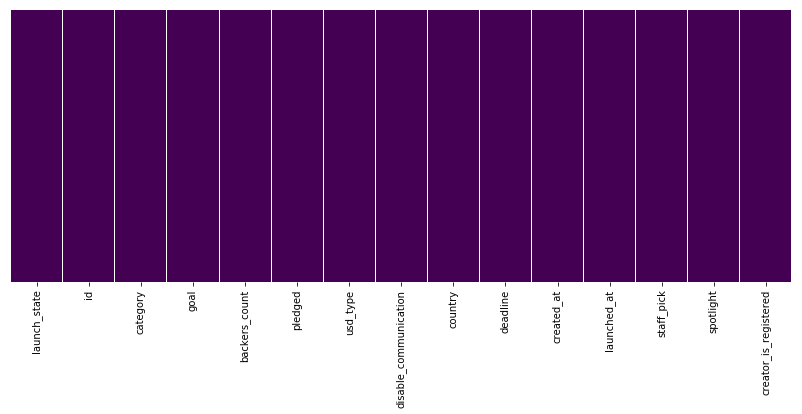

In [215]:
plt.figure(figsize=(14,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

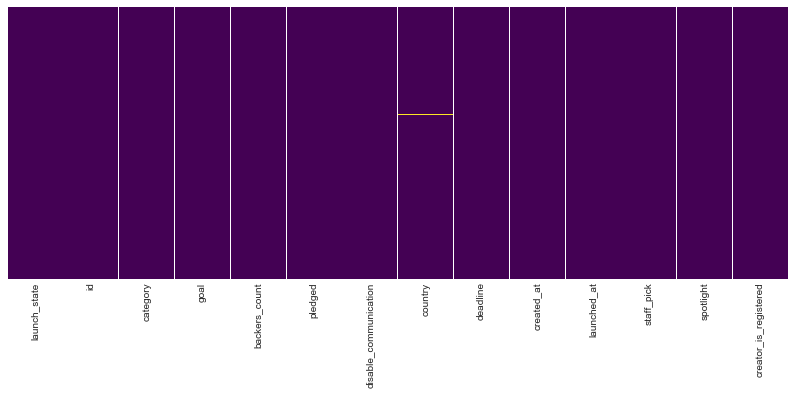

In [514]:
%matplotlib qt
plt.figure(figsize=(14,5))
sns.heatmap(df=='', yticklabels=False, cbar=False, cmap='viridis')

In [216]:
(df.isnull()).sum()

launch_state             0
id                       0
category                 0
goal                     0
backers_count            0
pledged                  0
usd_type                 0
disable_communication    0
country                  0
deadline                 0
created_at               0
launched_at              0
staff_pick               0
spotlight                0
creator_is_registered    0
dtype: int64

In [217]:
(df.isna()).sum()

launch_state             0
id                       0
category                 0
goal                     0
backers_count            0
pledged                  0
usd_type                 0
disable_communication    0
country                  0
deadline                 0
created_at               0
launched_at              0
staff_pick               0
spotlight                0
creator_is_registered    0
dtype: int64

In [218]:
# Lots of strings, though...let's look for empty strings
(df == '').sum()

launch_state                0
id                          0
category                    0
goal                        0
backers_count               0
pledged                     0
usd_type                 1041
disable_communication       0
country                     0
deadline                    0
created_at                  0
launched_at                 0
staff_pick                  0
spotlight                   0
creator_is_registered       0
dtype: int64

In [226]:
# There are 0 null/na values and 1041 empty strings, all of which are in the 'usd_type' column. 

In [228]:
df['usd_type'].unique()

array(['international', '', 'domestic'], dtype=object)

In [220]:
# Retrieve list of project IDs that have usd_country=''
df[df['usd_type']=='']['id'].values

array([1374381356,  746318505,  308013635, ...,  511217845, 2021379691,
        974235482], dtype=int64)

In [221]:
df00 = pd.read_csv('data/df00.csv', sep=',', na_filter=False, index_col=0)

In [231]:
df00[df00['id'].isin(df[df['usd_type']=='international']['id'].values)].sort_values(by='id').drop_duplicates('id')[['country','currency','usd_type']]

,country,currency,usd_type
90019,US,USD,international
80300,GB,GBP,international
17044,US,USD,international
97346,US,USD,international
13938,US,USD,international
139484,US,USD,international
40044,US,USD,international
2865,US,USD,international
163504,US,USD,international
88837,US,USD,international


In [232]:
df00[df00['id'].isin(df[df['usd_type']=='']['id'].values)].sort_values(by='id').drop_duplicates('id')["country"].unique()

array(['US', 'NL', 'GB', 'ES', 'CA', 'SG', 'AU', 'FR', 'DK', 'NZ', 'SE',
       'IT', 'NO', 'HK', 'CH', 'DE', 'BE', 'IE'], dtype=object)

In [239]:
# I cannot get a firm grasp of what 'usd_type' is or how the labeling works. eg there are many instances of a project
# country being US with currency being USD and then usd_type being international.

# Futher, the vast majority of usd_type is labelled international.

#Let's just delete it.

In [236]:
sum(df['usd_type']=='international')

151397

In [237]:
sum(df['usd_type']=='domestic')

146

In [244]:
sum(df['usd_type']=='')

1041

In [245]:
df.drop(columns='usd_type', inplace=True)

In [246]:
# df.replace(r'^\s*$', 'US', regex=True, inplace=True)

In [247]:
df['country'].unique()

array(['US', 'GB', 'CA', 'AU', 'ES', 'DE', 'SE', 'IT', 'BE', 'DK', 'AT',
       'CH', 'HK', 'SG', 'NO', 'NL', 'IE', 'FR', 'NZ', 'MX', 'JP', 'LU'],
      dtype=object)

In [248]:
(df == '').sum()

launch_state             0
id                       0
category                 0
goal                     0
backers_count            0
pledged                  0
disable_communication    0
country                  0
deadline                 0
created_at               0
launched_at              0
staff_pick               0
spotlight                0
creator_is_registered    0
dtype: int64

In [249]:
df.shape

(152584, 14)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152584 entries, 0 to 152583
Data columns (total 14 columns):
launch_state             152584 non-null object
id                       152584 non-null int64
category                 152584 non-null object
goal                     152584 non-null float64
backers_count            152584 non-null int64
pledged                  152584 non-null float64
disable_communication    152584 non-null bool
country                  152584 non-null object
deadline                 152584 non-null datetime64[ns]
created_at               152584 non-null datetime64[ns]
launched_at              152584 non-null datetime64[ns]
staff_pick               152584 non-null bool
spotlight                152584 non-null bool
creator_is_registered    152584 non-null bool
dtypes: bool(4), datetime64[ns](3), float64(2), int64(2), object(3)
memory usage: 12.2+ MB


In [529]:
# ---- FURTHER CLEAN UP OF launch_state ----
# There are five launch states: failed, successful, canceled, live, and suspended

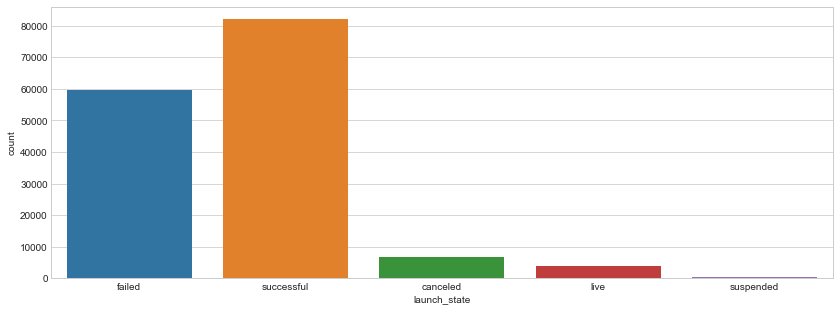

In [251]:
%matplotlib inline
plt.figure(figsize=(14,5))
sns.set_style('whitegrid')
sns.countplot(x='launch_state',data=df)

In [252]:
df['launch_state'].unique()

array(['failed', 'successful', 'canceled', 'live', 'suspended'],
      dtype=object)

Let's delete projects with launch state of canceled, live, or suspended.
* The number of canceled, live, and suspended is far less than failed and successful
* Live projects are not finished and so cannot be used as data to predict success or failure
* It is unknown why projects were canceled or suspended or whether or not they were eventually re-launched or unsuspended.

In [253]:
num_success = (df['launch_state'] == 'successful').sum()
num_failed = (df['launch_state'] == 'failed').sum()
num_total = len(df)

In [254]:
print('Success rate: ', round(num_success/num_total*100, 1), '%', '\n',
      'Failure rate: ', round(num_failed/num_total*100, 1), '%',
      sep='')

Success rate: 53.7%
Failure rate: 39.0%


From https://www.kickstarter.com/help/stats, *36.6% of projects successfully launch. This does not seem to jive with what we're seeing here. Why?*

The only explanation I can think of is that, per the site, the success rate is defined as the number of successfully funded projects divided by the number of projects that have reached their deadline (whether successful, failed, canceled, or suspended); maybe that by including 'live' projects and also not accounting for deadline I'm throwing off the data that much

In [255]:
num_active = num_total - (df['launch_state'] == 'live').sum()

In [256]:
print('Success rate: ', round(num_success/num_active*100, 1), '%', '\n',
      'Failure rate: ', round(num_failed/num_active*100, 1), '%',
      sep='')

Success rate: 55.1%
Failure rate: 40.0%


That didn't fix it and in fact made success rate grow rathe than shrink. Maybe there are many projects in the dataset that are tagged 'successful' (ie met their goal) but the deadline has not yet passed.

In [257]:
df.head(3)

,launch_state,id,category,goal,backers_count,pledged,disable_communication,country,deadline,created_at,launched_at,staff_pick,spotlight,creator_is_registered
0,failed,895922629,technology,3500.0,1,50.00,False,US,2014-11-28 04:59:00,2014-10-16 16:19:46,2014-10-28 19:42:54,False,False,True
1,successful,1190376005,games,225.0,63,1613.47,False,US,2011-11-02 18:39:11,2011-09-28 13:44:12,2011-10-17 18:39:11,True,True,True
2,successful,672906219,publishing,6500.0,113,6633.00,False,US,2014-09-12 06:12:18,2014-06-21 04:22:09,2014-08-13 06:12:18,False,True,True


In [258]:
df.query("launch_state == 'failed' | launch_state == 'successful'", inplace=True)

In [259]:
df.reset_index(drop=True, inplace=True)

In [260]:
df['launch_state'].unique()

array(['failed', 'successful'], dtype=object)

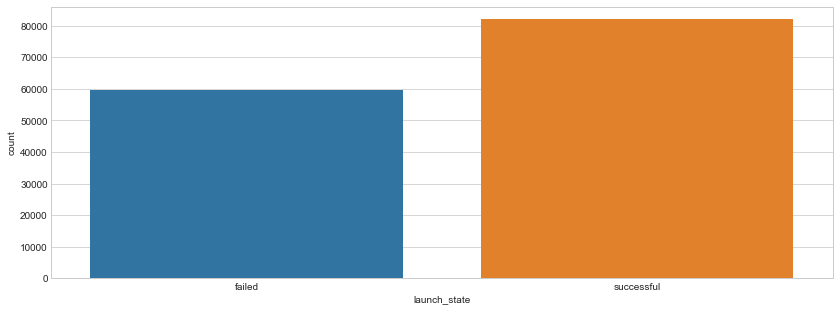

In [261]:
plt.figure(figsize=(14,5))
sns.set_style('whitegrid')
sns.countplot(x='launch_state',data=df)

In [262]:
df['disable_communication'].unique()

array([False])

In [263]:
df['staff_pick'].unique()

array([False,  True])

In [264]:
df['spotlight'].unique()

array([False,  True])

In [265]:
df['creator_is_registered'].unique()

array([ True])

In [266]:
df.drop(columns=['disable_communication', 'creator_is_registered'], inplace=True)

In [267]:
df.shape

(141447, 12)

In [268]:
df.head()

,launch_state,id,category,goal,backers_count,pledged,country,deadline,created_at,launched_at,staff_pick,spotlight
0,failed,895922629,technology,3500.0,1,50.00,US,2014-11-28 04:59:00,2014-10-16 16:19:46,2014-10-28 19:42:54,False,False
1,successful,1190376005,games,225.0,63,1613.47,US,2011-11-02 18:39:11,2011-09-28 13:44:12,2011-10-17 18:39:11,True,True
2,successful,672906219,publishing,6500.0,113,6633.00,US,2014-09-12 06:12:18,2014-06-21 04:22:09,2014-08-13 06:12:18,False,True
3,failed,2121203785,fashion,15000.0,1,1.00,GB,2016-05-03 20:04:16,2016-03-04 15:03:52,2016-03-04 21:04:16,False,False
4,successful,434454655,fashion,15000.0,99,25338.00,CA,2015-04-22 05:01:38,2015-02-12 21:29:27,2015-03-18 05:01:38,False,True


In [548]:
# ---- CONVERT CATEGORICAL VARIABLES TO DUMMY VARIABLES ----

In [269]:
category = pd.get_dummies(df['category'], drop_first=True)

In [270]:
category.head()

,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [271]:
country = pd.get_dummies(df['country'], drop_first=True)

In [272]:
country.head()

,AU,BE,CA,CH,DE,DK,ES,FR,GB,HK,IE,IT,JP,LU,MX,NL,NO,NZ,SE,SG,US
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [273]:
d_launch_state = dict(zip(['failed','successful'], range(0,2)))

In [274]:
d_launch_state

{'failed': 0, 'successful': 1}

In [275]:
launch_state = df['launch_state'].map(d_launch_state)

In [276]:
df[df['launch_state'] == 'successful'].shape[0] - launch_state.sum() # Check mapping

0

In [277]:
# Drop the categorical launch_state column (keep 'category' and 'country' for visualization)

In [278]:
df.drop(['launch_state'],axis=1,inplace=True)

In [279]:
df.head()

,id,category,goal,backers_count,pledged,country,deadline,created_at,launched_at,staff_pick,spotlight
0,895922629,technology,3500.0,1,50.00,US,2014-11-28 04:59:00,2014-10-16 16:19:46,2014-10-28 19:42:54,False,False
1,1190376005,games,225.0,63,1613.47,US,2011-11-02 18:39:11,2011-09-28 13:44:12,2011-10-17 18:39:11,True,True
2,672906219,publishing,6500.0,113,6633.00,US,2014-09-12 06:12:18,2014-06-21 04:22:09,2014-08-13 06:12:18,False,True
3,2121203785,fashion,15000.0,1,1.00,GB,2016-05-03 20:04:16,2016-03-04 15:03:52,2016-03-04 21:04:16,False,False
4,434454655,fashion,15000.0,99,25338.00,CA,2015-04-22 05:01:38,2015-02-12 21:29:27,2015-03-18 05:01:38,False,True


In [280]:
df.columns

Index(['id', 'category', 'goal', 'backers_count', 'pledged', 'country',
       'deadline', 'created_at', 'launched_at', 'staff_pick', 'spotlight'],
      dtype='object')

In [281]:
# Add the new dummy variable launch_state column and move it to column index 1 and country to column index 3
df = pd.concat([launch_state, df], axis=1)
df = df[['launch_state', 'id', 'category', 'country', 'goal', 'backers_count', 'pledged',
       'deadline', 'created_at', 'launched_at', 'staff_pick', 'spotlight']]

In [282]:
df.head()

,launch_state,id,category,country,goal,backers_count,pledged,deadline,created_at,launched_at,staff_pick,spotlight
0,0,895922629,technology,US,3500.0,1,50.00,2014-11-28 04:59:00,2014-10-16 16:19:46,2014-10-28 19:42:54,False,False
1,1,1190376005,games,US,225.0,63,1613.47,2011-11-02 18:39:11,2011-09-28 13:44:12,2011-10-17 18:39:11,True,True
2,1,672906219,publishing,US,6500.0,113,6633.00,2014-09-12 06:12:18,2014-06-21 04:22:09,2014-08-13 06:12:18,False,True
3,0,2121203785,fashion,GB,15000.0,1,1.00,2016-05-03 20:04:16,2016-03-04 15:03:52,2016-03-04 21:04:16,False,False
4,1,434454655,fashion,CA,15000.0,99,25338.00,2015-04-22 05:01:38,2015-02-12 21:29:27,2015-03-18 05:01:38,False,True


In [563]:
# Add the dummy variable country and category variables

In [283]:
df = pd.concat([df, category, country], axis=1)

In [284]:
df.columns[0:13]

Index(['launch_state', 'id', 'category', 'country', 'goal', 'backers_count',
       'pledged', 'deadline', 'created_at', 'launched_at', 'staff_pick',
       'spotlight', 'comics'],
      dtype='object')

In [285]:
df.isnull().sum().sum() # Check for nulls

0

In [286]:
df.isna().sum().sum() # Check for na

0

In [287]:
(df == '').sum().sum()

0

In [288]:
df.shape

(141447, 47)

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141447 entries, 0 to 141446
Data columns (total 47 columns):
launch_state     141447 non-null int64
id               141447 non-null int64
category         141447 non-null object
country          141447 non-null object
goal             141447 non-null float64
backers_count    141447 non-null int64
pledged          141447 non-null float64
deadline         141447 non-null datetime64[ns]
created_at       141447 non-null datetime64[ns]
launched_at      141447 non-null datetime64[ns]
staff_pick       141447 non-null bool
spotlight        141447 non-null bool
comics           141447 non-null uint8
crafts           141447 non-null uint8
dance            141447 non-null uint8
design           141447 non-null uint8
fashion          141447 non-null uint8
film & video     141447 non-null uint8
food             141447 non-null uint8
games            141447 non-null uint8
journalism       141447 non-null uint8
music            141447 non-null uint8


Now we need to consider what exactly some of those columns mean:
* id - still just a primary key
* pledged - somewhat useless except as a comparison to the goal. Drop pledged but add a pledged_ratio column (pledged/goal)
* goal - keep for now but we might drop later due to the potentially high variance with pledged
* deadline - useless except in comparison to launched_at. Drop deadline but add funding_days.
* created_at - useless; launched_at is more applicable.
* launched_at - keep to maybe create some time series plots; move before funding_days
* staff_pick - not exactly sure but convert to 0 (false) and 1 (true)
* spotlight - not exactly sure but covert to 0 (false) and 1 (true)

In [290]:
df.columns[0:13]

Index(['launch_state', 'id', 'category', 'country', 'goal', 'backers_count',
       'pledged', 'deadline', 'created_at', 'launched_at', 'staff_pick',
       'spotlight', 'comics'],
      dtype='object')

In [291]:
pledged_ratio = df['pledged'] / df['goal']

In [292]:
pledged_ratio.head()

0    0.014286
1    7.170978
2    1.020462
3    0.000067
4    1.689200
dtype: float64

In [293]:
df[['pledged', 'goal']].head()

,pledged,goal
0,50.00,3500.0
1,1613.47,225.0
2,6633.00,6500.0
3,1.00,15000.0
4,25338.00,15000.0


In [294]:
df.columns

Index(['launch_state', 'id', 'category', 'country', 'goal', 'backers_count',
       'pledged', 'deadline', 'created_at', 'launched_at', 'staff_pick',
       'spotlight', 'comics', 'crafts', 'dance', 'design', 'fashion',
       'film & video', 'food', 'games', 'journalism', 'music', 'photography',
       'publishing', 'technology', 'theater', 'AU', 'BE', 'CA', 'CH', 'DE',
       'DK', 'ES', 'FR', 'GB', 'HK', 'IE', 'IT', 'JP', 'LU', 'MX', 'NL', 'NO',
       'NZ', 'SE', 'SG', 'US'],
      dtype='object')

In [295]:
df.columns.get_loc("pledged")

6

In [296]:
df.insert(loc=df.columns.get_loc("pledged"), column='pledged_ratio', value=pledged_ratio)

In [297]:
df.shape

(141447, 48)

In [298]:
df.columns

Index(['launch_state', 'id', 'category', 'country', 'goal', 'backers_count',
       'pledged_ratio', 'pledged', 'deadline', 'created_at', 'launched_at',
       'staff_pick', 'spotlight', 'comics', 'crafts', 'dance', 'design',
       'fashion', 'film & video', 'food', 'games', 'journalism', 'music',
       'photography', 'publishing', 'technology', 'theater', 'AU', 'BE', 'CA',
       'CH', 'DE', 'DK', 'ES', 'FR', 'GB', 'HK', 'IE', 'IT', 'JP', 'LU', 'MX',
       'NL', 'NO', 'NZ', 'SE', 'SG', 'US'],
      dtype='object')

In [299]:
df.drop(columns='pledged', inplace=True)

In [300]:
df.shape

(141447, 47)

In [301]:
df.columns[0:13]

Index(['launch_state', 'id', 'category', 'country', 'goal', 'backers_count',
       'pledged_ratio', 'deadline', 'created_at', 'launched_at', 'staff_pick',
       'spotlight', 'comics'],
      dtype='object')

In [302]:
df['deadline'][0]

Timestamp('2014-11-28 04:59:00')

In [303]:
df['launched_at'][0]

Timestamp('2014-10-28 19:42:54')

In [304]:
df['deadline'][0] - df['launched_at'][0]

Timedelta('30 days 09:16:06')

In [305]:
(df['deadline'][0] - df['launched_at'][0]).days

30

In [306]:
(df['deadline'] - df['launched_at']).head()

0   30 days 09:16:06
1   16 days 00:00:00
2   30 days 00:00:00
3   59 days 23:00:00
4   35 days 00:00:00
dtype: timedelta64[ns]

In [307]:
(df['deadline'] - df['launched_at']).dt.days.head()

0    30
1    16
2    30
3    59
4    35
dtype: int64

In [308]:
funding_days = (df['deadline'] - df['launched_at']).dt.days

In [309]:
df.insert(loc=df.columns.get_loc("deadline"), column='funding_days', value=funding_days)

In [310]:
df.drop(columns='deadline', inplace=True)

In [311]:
df.shape

(141447, 47)

In [312]:
df.head(2)

,launch_state,id,category,country,goal,backers_count,pledged_ratio,funding_days,created_at,launched_at,staff_pick,spotlight,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater,AU,BE,CA,CH,DE,DK,ES,FR,GB,HK,IE,IT,JP,LU,MX,NL,NO,NZ,SE,SG,US
0,0,895922629,technology,US,3500.0,1,0.014286,30,2014-10-16 16:19:46,2014-10-28 19:42:54,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1190376005,games,US,225.0,63,7.170978,16,2011-09-28 13:44:12,2011-10-17 18:39:11,True,True,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [313]:
df.drop(columns='created_at', inplace=True)

In [314]:
df.head(1)

,launch_state,id,category,country,goal,backers_count,pledged_ratio,funding_days,launched_at,staff_pick,spotlight,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater,AU,BE,CA,CH,DE,DK,ES,FR,GB,HK,IE,IT,JP,LU,MX,NL,NO,NZ,SE,SG,US
0,0,895922629,technology,US,3500.0,1,0.014286,30,2014-10-28 19:42:54,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [315]:
df.shape

(141447, 46)

In [316]:
df.columns[0:12]

Index(['launch_state', 'id', 'category', 'country', 'goal', 'backers_count',
       'pledged_ratio', 'funding_days', 'launched_at', 'staff_pick',
       'spotlight', 'comics'],
      dtype='object')

In [317]:
launched_at = df['launched_at']

In [318]:
launched_at

0        2014-10-28 19:42:54
1        2011-10-17 18:39:11
2        2014-08-13 06:12:18
3        2016-03-04 21:04:16
4        2015-03-18 05:01:38
5        2011-03-23 08:03:31
6        2012-05-22 15:26:21
7        2018-04-03 00:05:06
8        2011-03-15 14:29:07
9        2015-07-02 04:00:51
10       2013-08-23 17:28:33
11       2015-12-10 15:27:45
12       2013-08-01 21:20:58
13       2013-08-09 19:07:40
14       2015-09-29 18:47:55
15       2016-04-22 23:04:05
16       2016-06-01 19:01:50
17       2011-05-03 16:57:51
18       2015-01-02 19:04:27
19       2017-10-27 04:23:31
20       2011-06-10 21:55:58
21       2017-05-10 16:54:21
22       2014-02-01 08:03:14
23       2011-12-14 16:50:37
24       2017-10-30 14:00:47
25       2013-04-15 15:13:19
26       2015-06-15 20:18:53
27       2011-12-13 20:29:19
28       2013-03-19 03:37:47
29       2012-07-09 13:45:08
                 ...        
141417   2014-05-26 19:19:43
141418   2014-01-14 05:05:07
141419   2011-11-06 16:54:09
141420   2017-

In [319]:
df.drop(columns='launched_at', inplace=True)

In [320]:
df.head(1)

,launch_state,id,category,country,goal,backers_count,pledged_ratio,funding_days,staff_pick,spotlight,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater,AU,BE,CA,CH,DE,DK,ES,FR,GB,HK,IE,IT,JP,LU,MX,NL,NO,NZ,SE,SG,US
0,0,895922629,technology,US,3500.0,1,0.014286,30,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [321]:
df.insert(loc=2, column='launched_at', value=launched_at)

In [322]:
df.head(1)

,launch_state,id,launched_at,category,country,goal,backers_count,pledged_ratio,funding_days,staff_pick,spotlight,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater,AU,BE,CA,CH,DE,DK,ES,FR,GB,HK,IE,IT,JP,LU,MX,NL,NO,NZ,SE,SG,US
0,0,895922629,2014-10-28 19:42:54,technology,US,3500.0,1,0.014286,30,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141447 entries, 0 to 141446
Data columns (total 46 columns):
launch_state     141447 non-null int64
id               141447 non-null int64
launched_at      141447 non-null datetime64[ns]
category         141447 non-null object
country          141447 non-null object
goal             141447 non-null float64
backers_count    141447 non-null int64
pledged_ratio    141447 non-null float64
funding_days     141447 non-null int64
staff_pick       141447 non-null bool
spotlight        141447 non-null bool
comics           141447 non-null uint8
crafts           141447 non-null uint8
dance            141447 non-null uint8
design           141447 non-null uint8
fashion          141447 non-null uint8
film & video     141447 non-null uint8
food             141447 non-null uint8
games            141447 non-null uint8
journalism       141447 non-null uint8
music            141447 non-null uint8
photography      141447 non-null uint8
publishing       1

In [324]:
df.shape

(141447, 46)

In [325]:
df.columns[0:12]

Index(['launch_state', 'id', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'spotlight', 'comics'],
      dtype='object')

In [326]:
df.head()

,launch_state,id,launched_at,category,country,goal,backers_count,pledged_ratio,funding_days,staff_pick,spotlight,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater,AU,BE,CA,CH,DE,DK,ES,FR,GB,HK,IE,IT,JP,LU,MX,NL,NO,NZ,SE,SG,US
0,0,895922629,2014-10-28 19:42:54,technology,US,3500.0,1,0.014286,30,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1190376005,2011-10-17 18:39:11,games,US,225.0,63,7.170978,16,True,True,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,672906219,2014-08-13 06:12:18,publishing,US,6500.0,113,1.020462,30,False,True,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,2121203785,2016-03-04 21:04:16,fashion,GB,15000.0,1,0.000067,59,False,False,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,434454655,2015-03-18 05:01:38,fashion,CA,15000.0,99,1.689200,35,False,True,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [327]:
d_staff_pick = dict(zip([False,True], range(0,2)))
staff_pick = df['staff_pick'].map(d_staff_pick)

In [328]:
df[df['staff_pick'] == True].shape[0] - staff_pick.sum() # check mapping

0

In [329]:
d_spotlight = dict(zip([False,True], range(0,2)))
spotlight = df['spotlight'].map(d_spotlight)

In [330]:
df[df['spotlight'] == True].shape[0] - spotlight.sum() # check mapping

0

In [331]:
df.drop(['staff_pick','spotlight'],axis=1,inplace=True)

In [332]:
df.head(1)

,launch_state,id,launched_at,category,country,goal,backers_count,pledged_ratio,funding_days,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater,AU,BE,CA,CH,DE,DK,ES,FR,GB,HK,IE,IT,JP,LU,MX,NL,NO,NZ,SE,SG,US
0,0,895922629,2014-10-28 19:42:54,technology,US,3500.0,1,0.014286,30,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [333]:
df.insert(loc=df.columns.get_loc("comics"), column='staff_pick', value=staff_pick)

In [334]:
df.insert(loc=df.columns.get_loc("comics"), column='spotlight', value=spotlight)

In [335]:
df.head()

,launch_state,id,launched_at,category,country,goal,backers_count,pledged_ratio,funding_days,staff_pick,spotlight,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater,AU,BE,CA,CH,DE,DK,ES,FR,GB,HK,IE,IT,JP,LU,MX,NL,NO,NZ,SE,SG,US
0,0,895922629,2014-10-28 19:42:54,technology,US,3500.0,1,0.014286,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1190376005,2011-10-17 18:39:11,games,US,225.0,63,7.170978,16,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,672906219,2014-08-13 06:12:18,publishing,US,6500.0,113,1.020462,30,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,2121203785,2016-03-04 21:04:16,fashion,GB,15000.0,1,0.000067,59,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,434454655,2015-03-18 05:01:38,fashion,CA,15000.0,99,1.689200,35,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [336]:
df['staff_pick'].unique()

array([0, 1], dtype=int64)

In [337]:
df['spotlight'].unique()

array([0, 1], dtype=int64)

In [338]:
# Null value check
df.isnull().sum().sum()

0

In [339]:
df.isna().sum().sum()

0

In [340]:
(df == '').sum().sum()

0

In [341]:
df.head()

,launch_state,id,launched_at,category,country,goal,backers_count,pledged_ratio,funding_days,staff_pick,spotlight,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater,AU,BE,CA,CH,DE,DK,ES,FR,GB,HK,IE,IT,JP,LU,MX,NL,NO,NZ,SE,SG,US
0,0,895922629,2014-10-28 19:42:54,technology,US,3500.0,1,0.014286,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1190376005,2011-10-17 18:39:11,games,US,225.0,63,7.170978,16,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,672906219,2014-08-13 06:12:18,publishing,US,6500.0,113,1.020462,30,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,2121203785,2016-03-04 21:04:16,fashion,GB,15000.0,1,0.000067,59,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,434454655,2015-03-18 05:01:38,fashion,CA,15000.0,99,1.689200,35,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [342]:
# ========================================
# SAVE CSV
# ========================================
#df.to_csv('data/df01.csv', sep=",")